In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 그래프상에서 한글을 나타내기 위해 korean_mat 설치
! pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 24.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/download/final_df')

In [ ]:
df

,이슈,뉴스_개수,뉴스_댓글수,감정_좋아요,감정_훈훈해요,감정_슬퍼요,감정_화나요,청원_건수,청원_동의수,감정_표현
0,김용균씨 사망 사건,237,13405,2968,164,5681,13555,41,9261,22368
1,예멘 난민 입국,358,63852,6329,563,1253,127309,4070,538116,135454
2,유은혜 자격 논란,170,9859,8671,144,107,17067,479,130765,25989
3,삼성증권 배당사고,639,31019,5134,328,341,38890,453,272627,44693
4,일본 군함 욱일기,98,3790,1002,61,107,4665,196,46311,5835
5,조현민 갑질 사건,270,17680,3141,251,312,27599,1058,366412,31303
6,소년법 폐지,59,2387,342,23,23,3408,553,572806,3796
7,무고죄,166,19118,6501,274,737,21326,434,326308,28838
8,길고양이 학대,18,957,697,73,552,423,76,36573,1745
9,주휴수당,123,13153,2908,123,981,16104,247,64465,20116


In [ ]:
#### 코드 오류로 인해, 누락된 값들이 있었음 -> 이로 인해 일부 데이터값을 수정, 이는 **결과 해석 이후의 나온 데이터 조작이 아님**, 결과 해석 이전에 실행했던 수정
# 오류 수정_1
df.at[22, '청원_건수'] = 10
df.at[22, '청원_동의수'] = 10902
# 오류 수정_2
df.at[21,'청원_건수'] = 1547
df.at[21,'청원_동의수'] = 426181
# 오류 수정_3
df.at[23,'청원_건수'] = 1723
df.at[23,'청원_동의수'] = 653547
# 오류 수정_5
df.at[19,'청원_건수'] = 10
df.at[19,'청원_동의수'] = 49036
# 오류 수정_6
df.at[15,'청원_건수'] = 341
df.at[15,'청원_동의수'] = 41123
# 오류 수정_7
df.at[20,'청원_건수'] = 8
df.at[20,'청원_동의수'] = 12629
# 오류 수정_8
df.at[26,'청원_건수'] = 5544
df.at[26,'청원_동의수'] = 670687
# 오류 수정_9
df.at[25,'청원_건수'] = 213
df.at[25,'청원_동의수'] = 8843
# 오류 수정_10
df.at[6,'뉴스_개수'] = 110
# 오류 수정 11


In [ ]:
df['감정_표현'] = df['감정_좋아요'] + df['감정_훈훈해요'] + df['감정_화나요'] + df['감정_슬퍼요']


In [ ]:
from sklearn.preprocessing import StandardScaler

# PCA 적용을 위해 필요한 변수들만 추출
features = df[['뉴스_개수', '뉴스_댓글수','감정_표현','청원_건수', '청원_동의수']]

# 데이터 정규화 (로그 변환)
features = np.log1p(features)  # log1p를 사용하여 0 및 음수 값을 피합니다

features

,뉴스_개수,뉴스_댓글수,감정_표현,청원_건수,청원_동의수
0,5.472271,9.503458,10.015431,3.737670,9.133675
1,5.883322,11.064339,11.816395,8.311644,13.195831
2,5.141664,9.196241,10.165467,6.173786,11.781165
3,6.461468,10.342387,10.707595,6.118097,12.515864
4,4.595120,8.240385,8.671801,5.283204,10.743156
5,5.602119,9.780246,10.351501,6.965080,12.811516
6,4.709530,7.778211,8.241967,6.317165,13.258304
7,5.117994,9.858438,10.269484,6.075346,12.695600
8,2.944439,6.864848,7.465083,4.343805,10.507093
9,4.820282,9.484481,9.909321,5.513429,11.073893


#### PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# PCA 적용
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

principal_components.shape

(27, 2)

Explained Variance Ratio: [0.7996677  0.14432168]


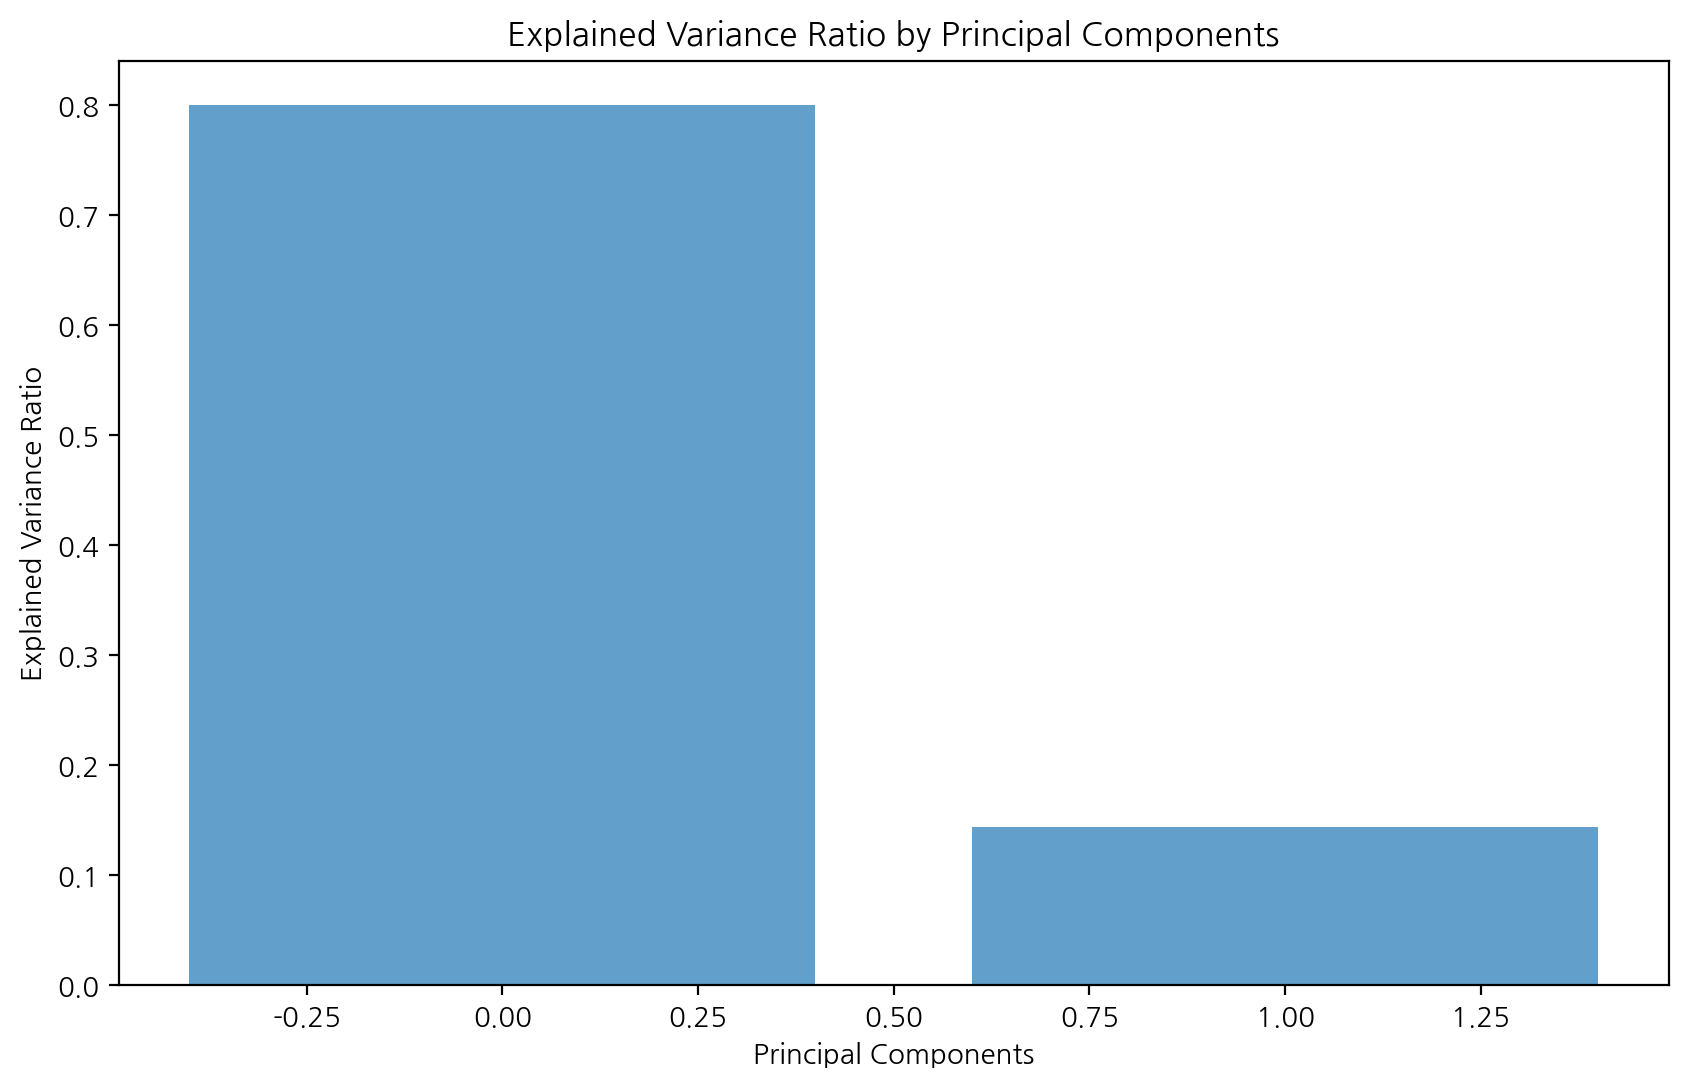

In [ ]:
# 주성분별 가중치 (Components) 확인
pca_components = pca.components_


# 각 주성분이 설명하는 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 분산 비율 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()



#### 두개의 pca가 원래 데이터의 분산을 약 94%를 설명한다

                          뉴스_개수    뉴스_댓글수     감정_표현     청원_건수    청원_동의수
Principal Component 1 -0.258711 -0.666047 -0.610548 -0.291016 -0.178861
Principal Component 2  0.052895  0.247333  0.221098 -0.670223 -0.661774


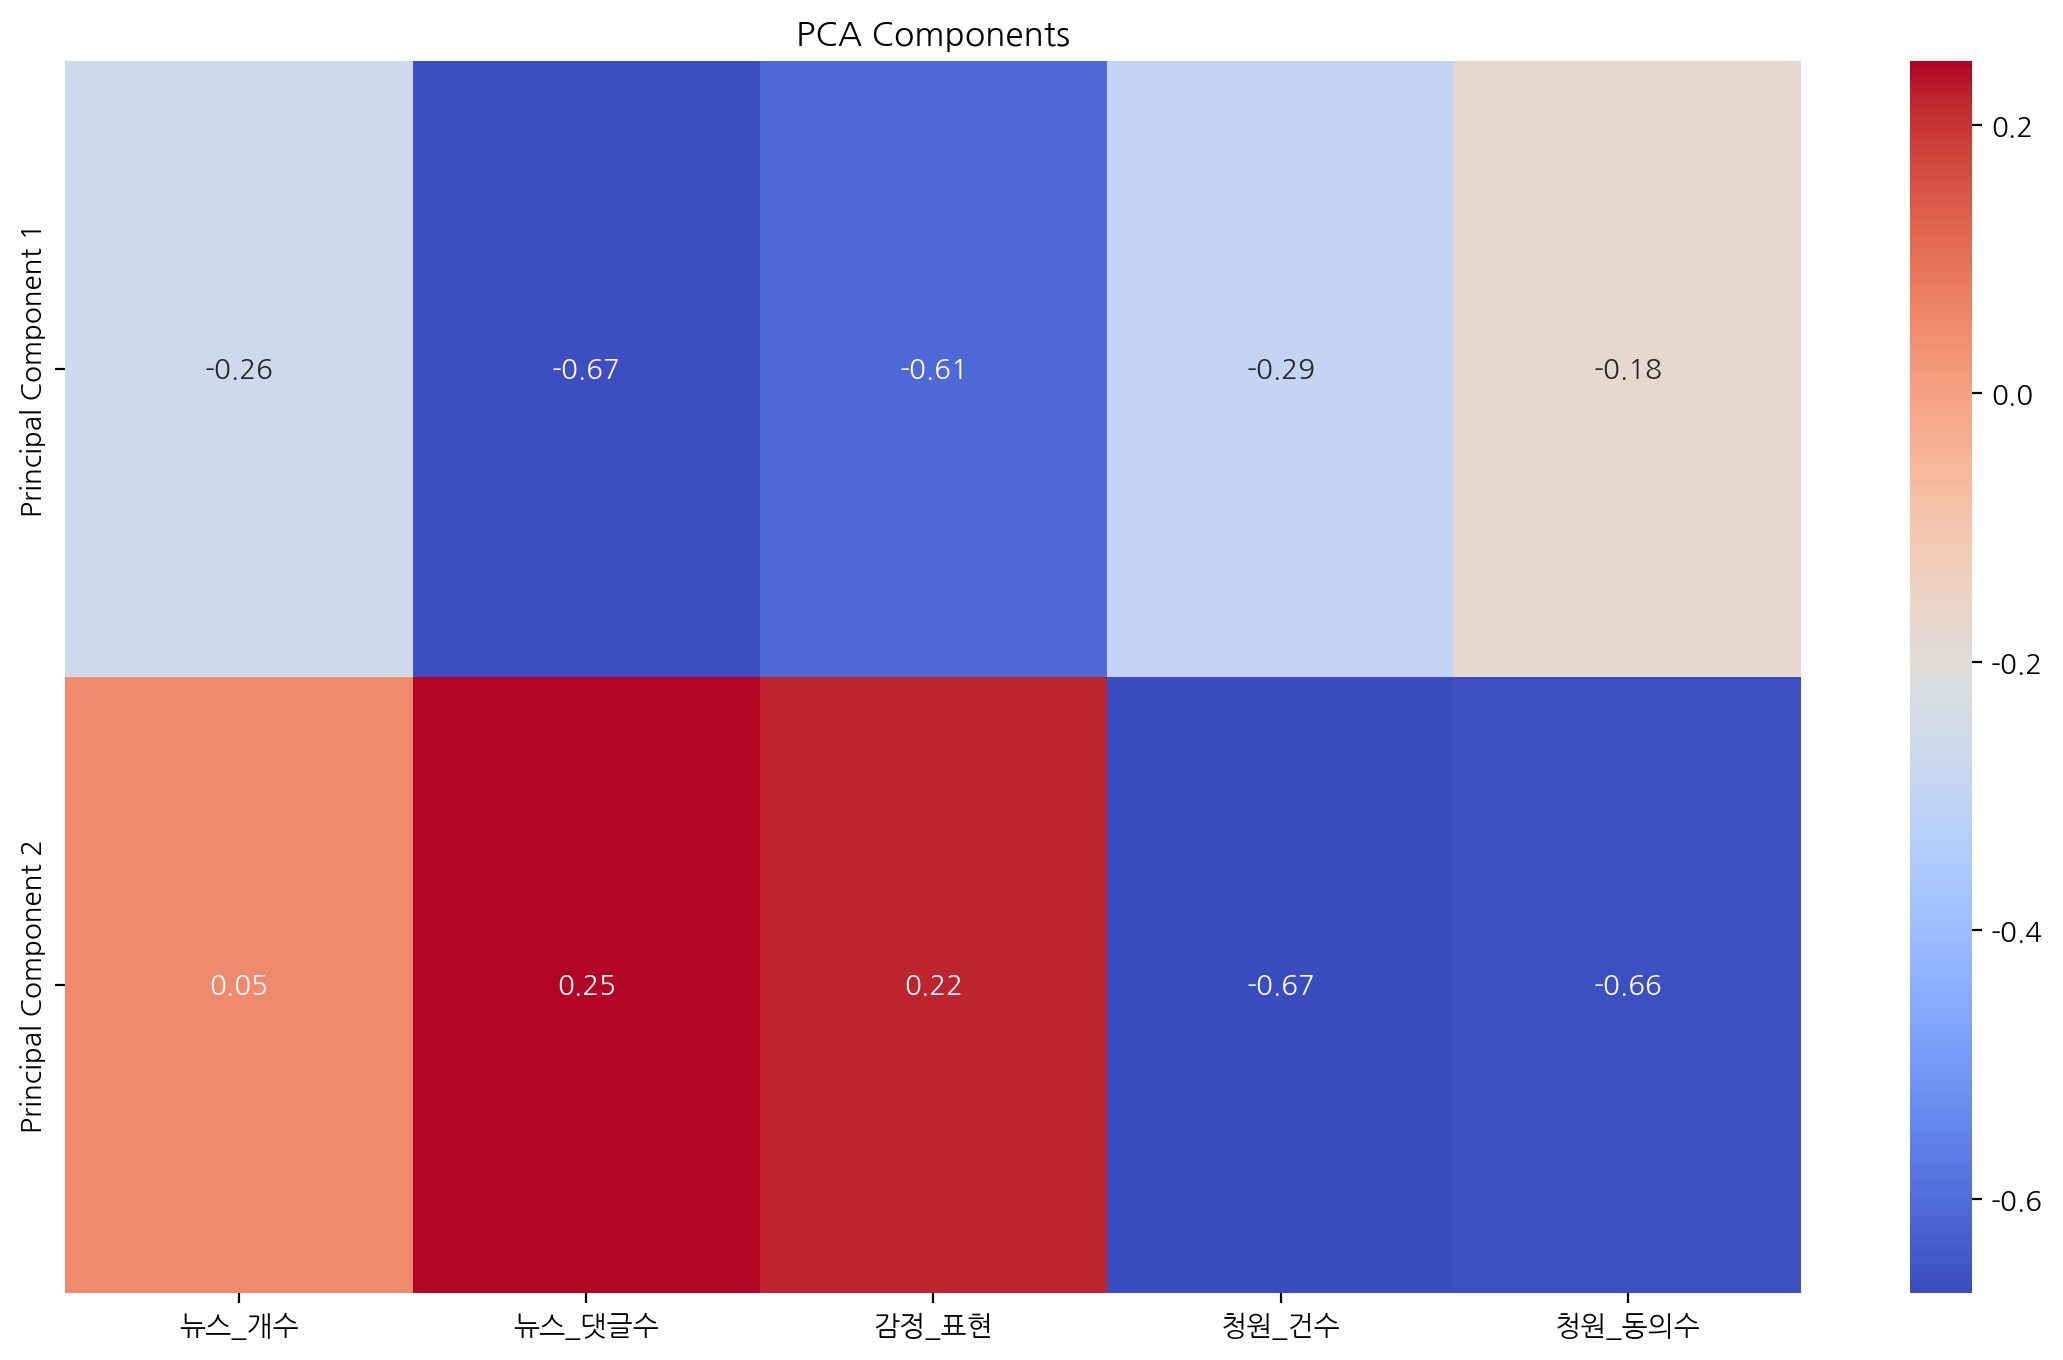

In [ ]:
#주성분별 가중치 DataFrame 생성
pca_df = pd.DataFrame(pca_components, columns=['뉴스_개수', '뉴스_댓글수','감정_표현','청원_건수', '청원_동의수'])
pca_df.index = ['Principal Component 1', 'Principal Component 2']
print(pca_df)


# 가중치 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(pca_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PCA Components')
plt.show()

#### PCA1과 PCA2 두개의 축을 원래 데이터를 산점도로 표시

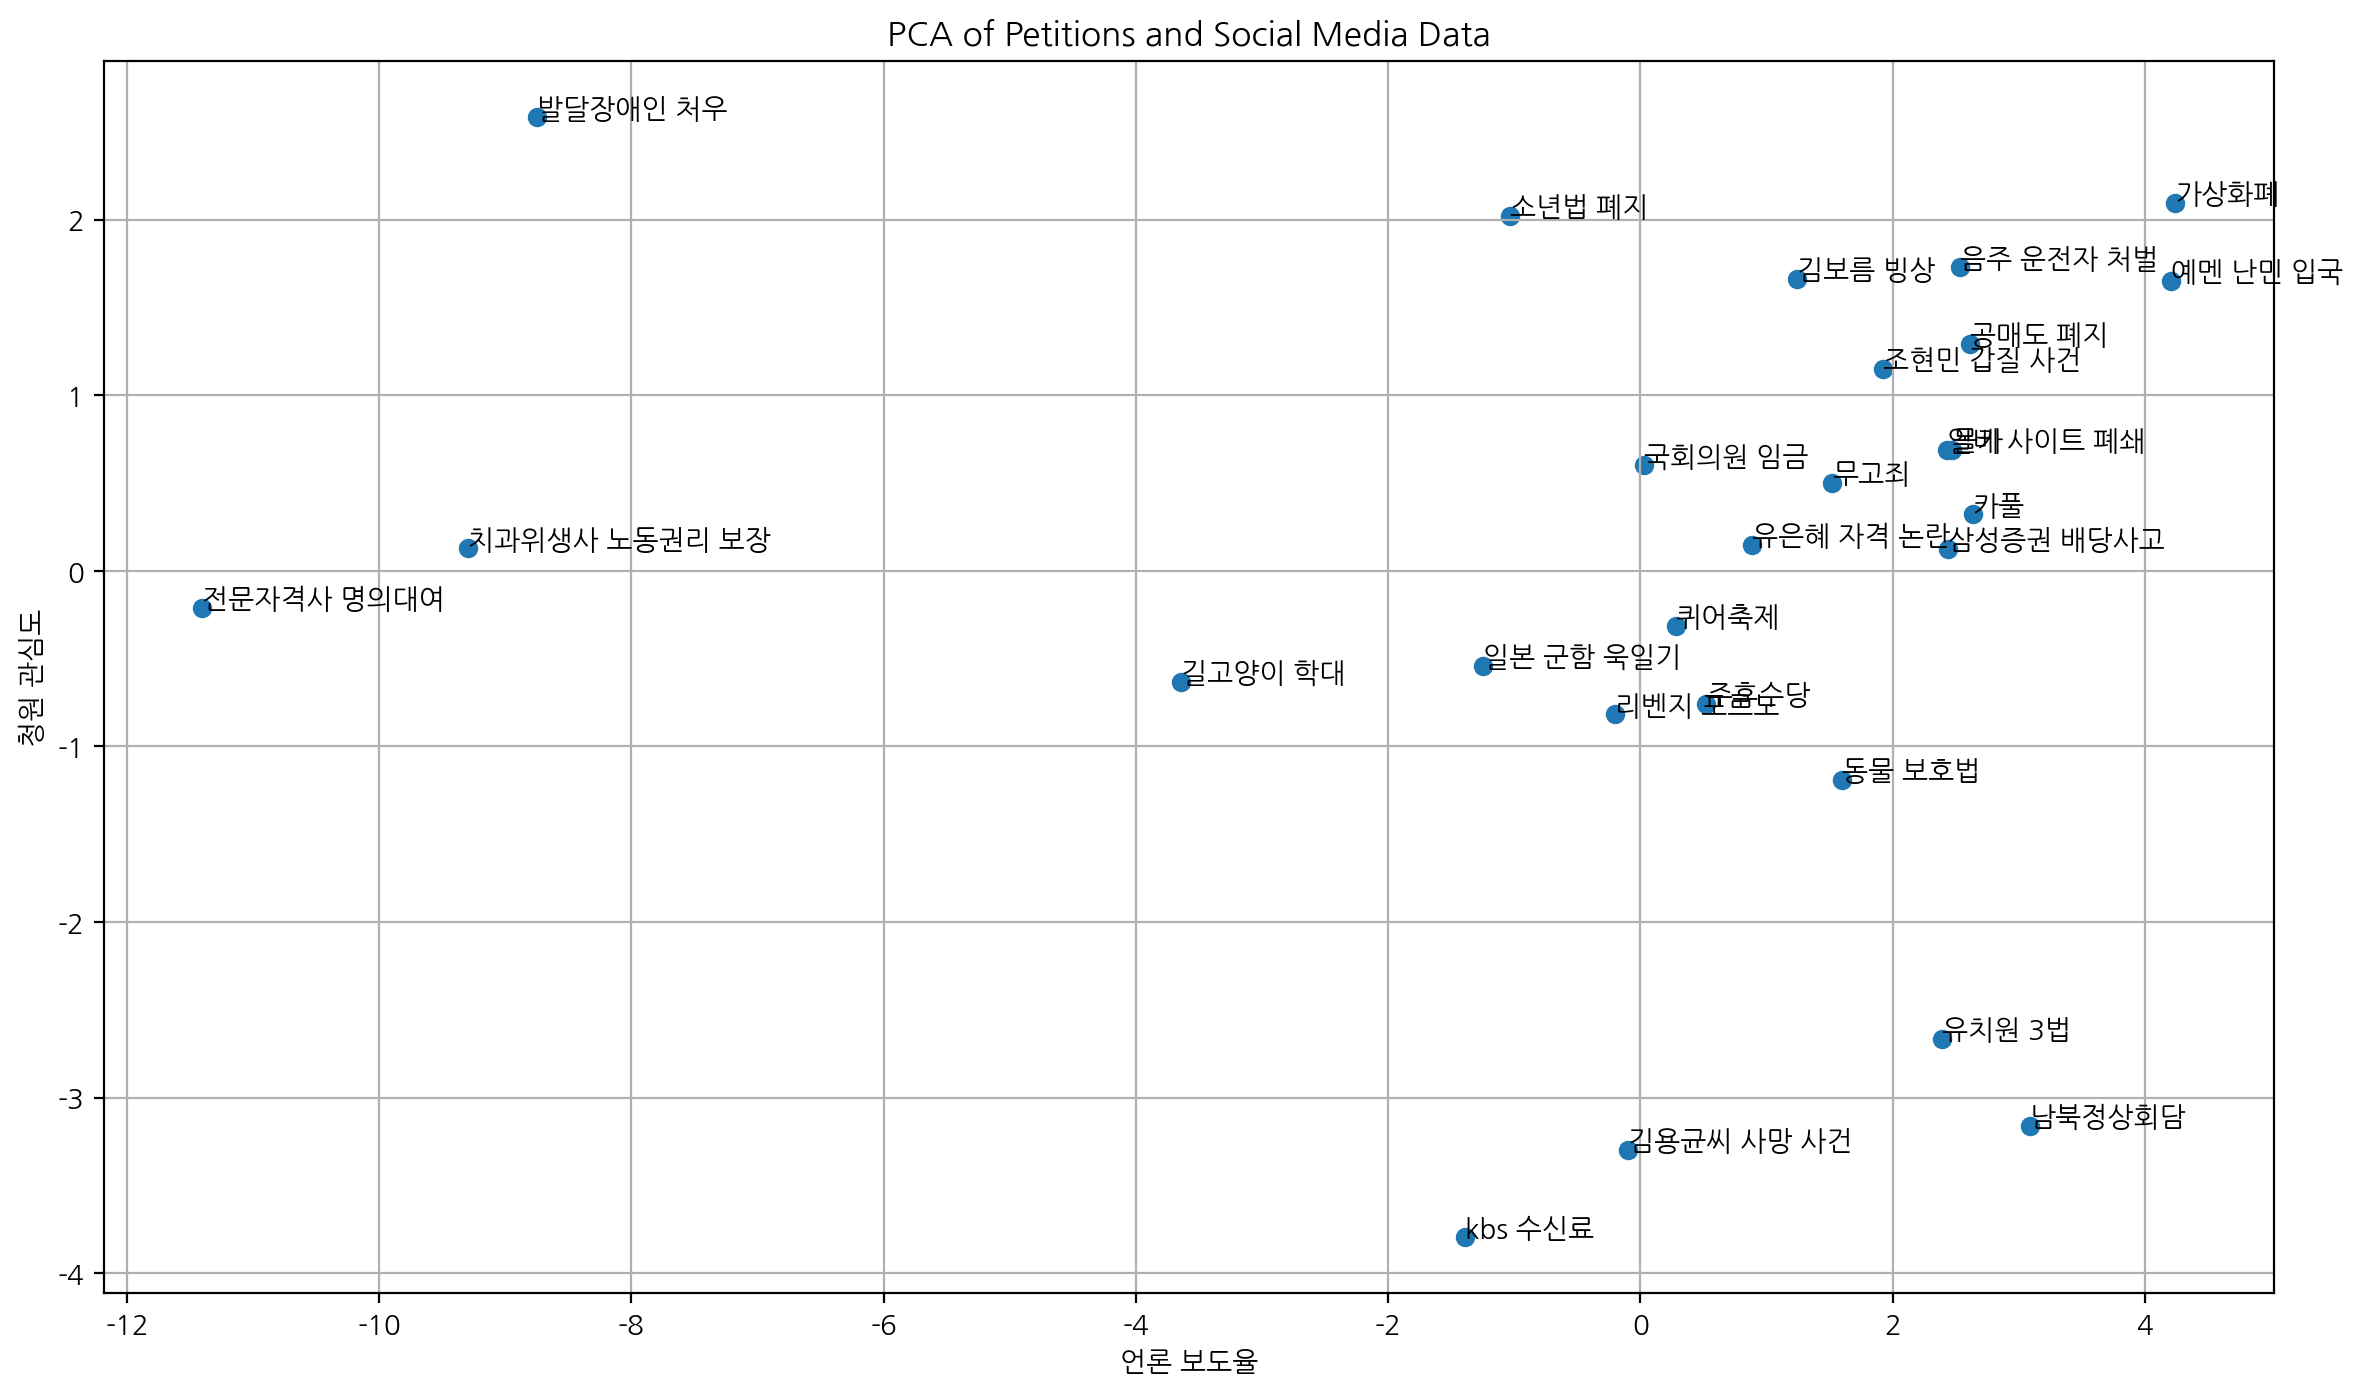

In [ ]:
# 결과 DataFrame 생성
pca_log_df = pd.DataFrame(data=(principal_components*(-1)), columns=['Principal Component 1', 'Principal Component 2'])
pca_log_df['이슈'] = df['이슈']

# 결과 시각화
plt.figure(figsize=(14, 8))
plt.scatter(pca_log_df['Principal Component 1'], pca_log_df['Principal Component 2'])

# 각 점에 레이블 추가
for i, txt in enumerate(pca_log_df['이슈']):
    plt.annotate(txt, (pca_log_df['Principal Component 1'][i], pca_log_df['Principal Component 2'][i]))

plt.title('PCA of Petitions and Social Media Data')
plt.xlabel('언론 보도율')
plt.ylabel('청원 관심도')
plt.grid()
plt.show()

#### PCA를 실행한 이후에, k-means 클러스터링을 시행
*   k_클러스터링을 시행하기 이전에 몇개의 군집이 최적인지를 판단

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

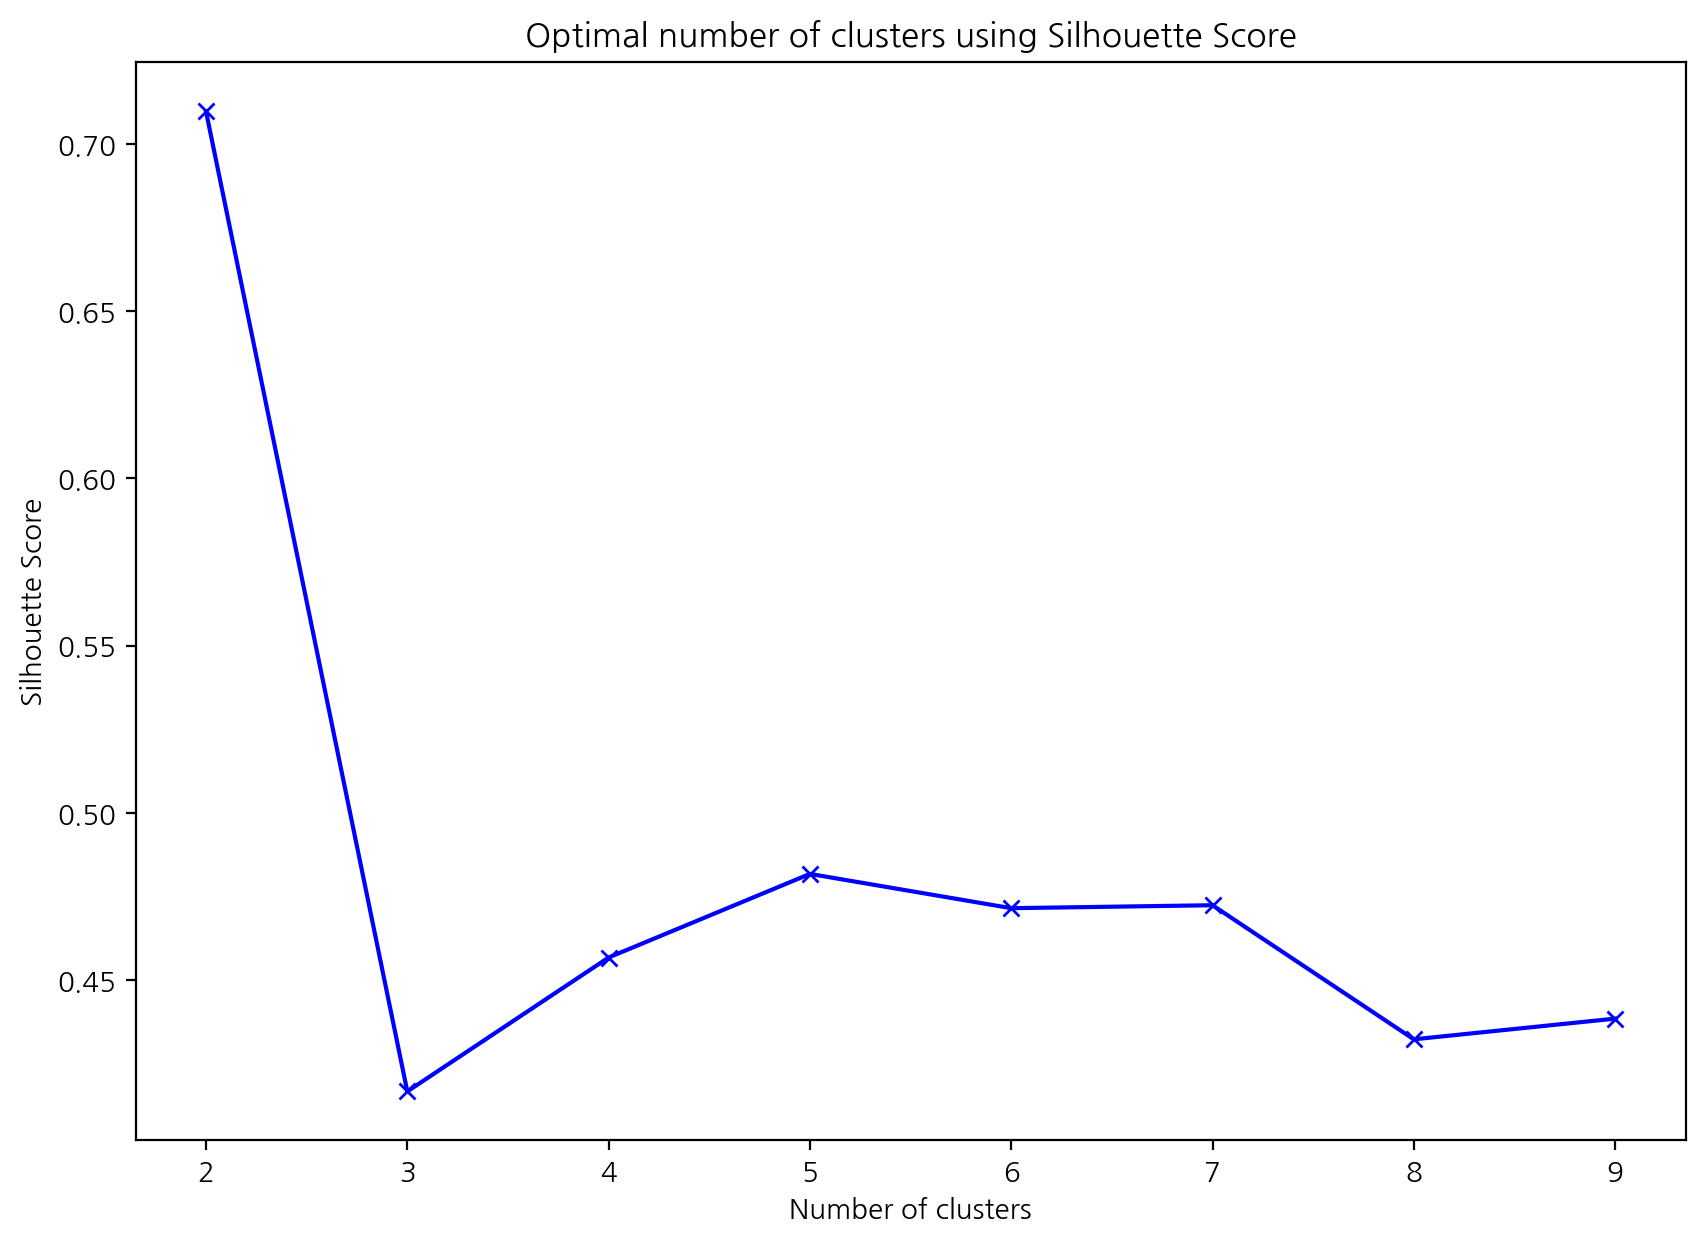

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# KMeans 최적의 클러스터 개수 찾기
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_log_df[['Principal Component 1', 'Principal Component 2']])
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(pca_log_df[['Principal Component 1', 'Principal Component 2']], labels))

# 시각화
plt.figure(figsize=(10, 7))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal number of clusters using Silhouette Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



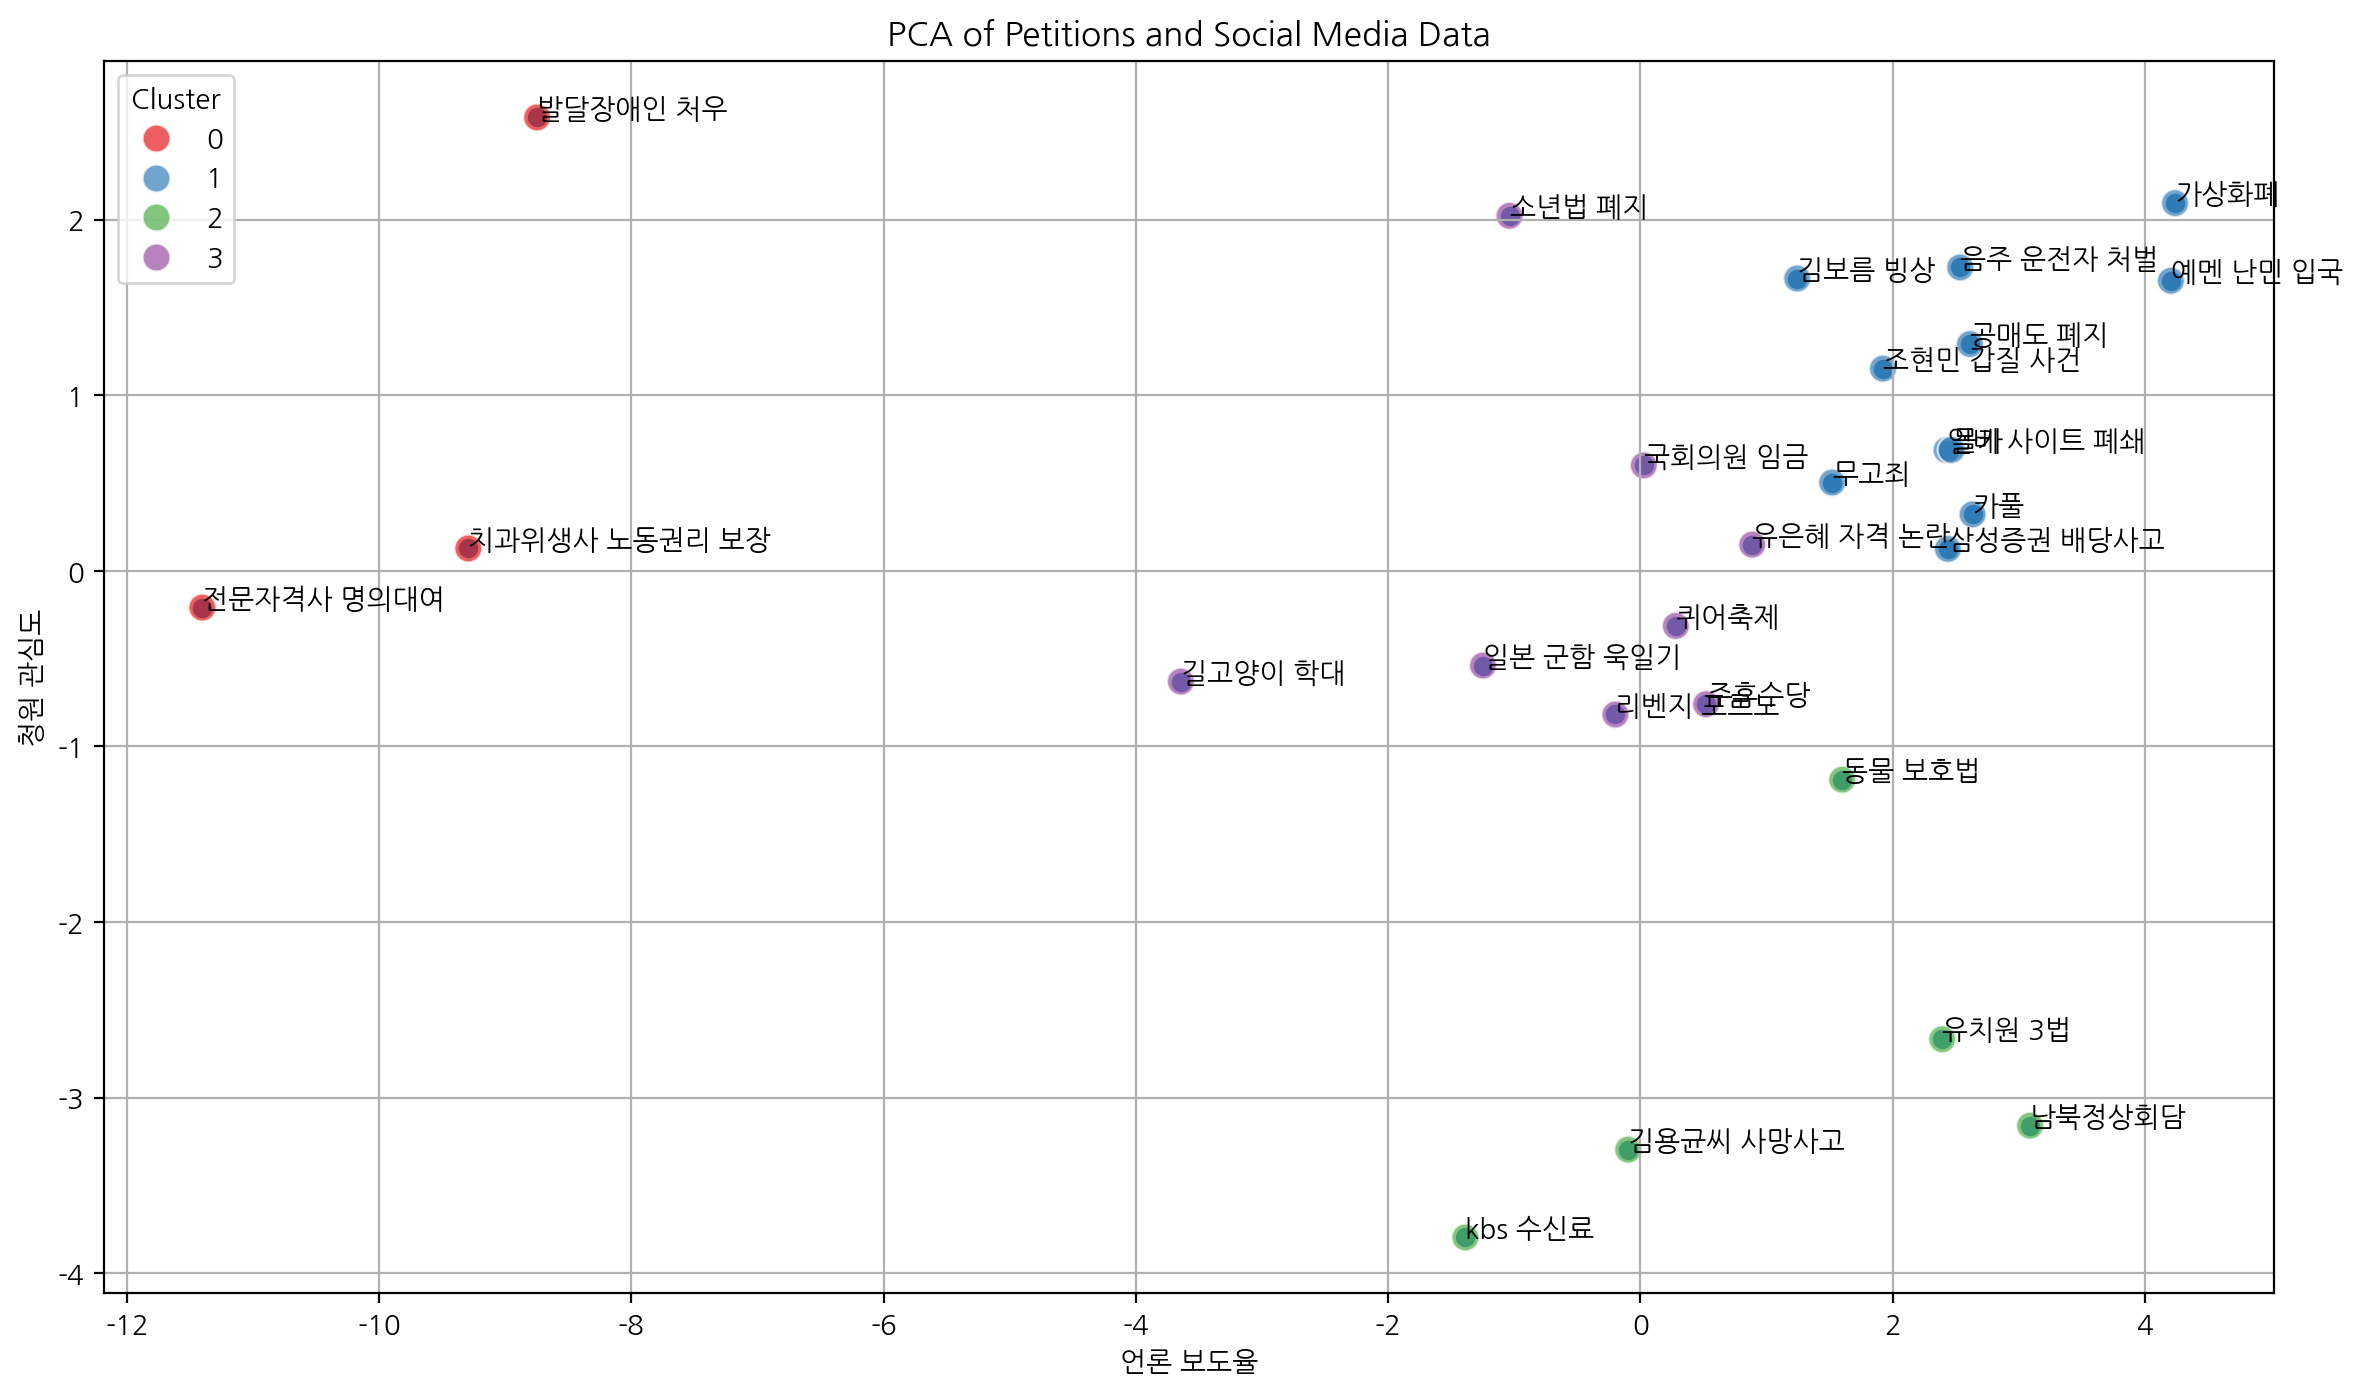

In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px


import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA 수행
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data=principalComponents * (-1), columns=['PC1', 'PC2'])

# 클러스터링 수행
kmeans = KMeans(n_clusters=4, random_state=42).fit(principalDf)
principalDf['Cluster'] = kmeans.labels_
principalDf['이슈'] = df['이슈']
principalDf.iloc[0, 3] = '김용균씨 사망사고'  # 이슈 이름 업데이트

# 결과 시각화
fig = px.scatter(principalDf, x='PC1', y='PC2', color='Cluster',
                 title='PCA of Petitions and Social Media Data with Clustering',
                 labels={'PC1': '대중_관심도', 'PC2': '청원률'},
                 hover_data={'이슈': True})

# 결과 시각화
plt.figure(figsize=(14, 8))
plt.scatter(principalDf['PC1'], principalDf['PC2'])

# 각 군집에 다른 색깔을 지정하여 scatter plot 생성
sns.scatterplot(data=principalDf, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, edgecolor='w', alpha=0.7)

# 각 점에 레이블 추가
for i, txt in enumerate(principalDf['이슈']):
    plt.annotate(txt, (principalDf['PC1'][i], principalDf['PC2'][i]))

plt.title('PCA of Petitions and Social Media Data')
plt.xlabel('언론 보도율')
plt.ylabel('청원 관심도')
plt.grid()
plt.show()

